In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob

plt.style.use("ggplot")
pd.set_option("display.max_columns", None)

In [3]:
dfs = {}

for fn in glob("*.csv"):
    print(fn.split(".")[0].split("_dataset")[0])
    dfs[fn.split(".")[0].split("_dataset")[0]] = pd.read_csv(fn)
    df = pd.read_csv(fn)
    shape = df.shape
    nb_na = df.isna().sum().sum()
    dup = df.duplicated().sum()
    print(f"Shape : {shape}\t NA : {nb_na}\t Duplicated : {dup}")

olist_customers
Shape : (99441, 5)	 NA : 0	 Duplicated : 0
olist_geolocation
Shape : (1000163, 5)	 NA : 0	 Duplicated : 261831
olist_orders
Shape : (99441, 8)	 NA : 4908	 Duplicated : 0
olist_order_items
Shape : (112650, 7)	 NA : 0	 Duplicated : 0
olist_order_payments
Shape : (103886, 5)	 NA : 0	 Duplicated : 0
olist_order_reviews
Shape : (99224, 7)	 NA : 145903	 Duplicated : 0
olist_products
Shape : (32951, 9)	 NA : 2448	 Duplicated : 0
olist_sellers
Shape : (3095, 4)	 NA : 0	 Duplicated : 0
product_category_name_translation
Shape : (71, 2)	 NA : 0	 Duplicated : 0


## customers :

In [4]:
dfs["olist_customers"]

customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix          customer_city customer_state  
0                         14409                 franca             SP  
1                          9790  sao bernardo do campo             SP  
2                          1151              sao paulo             SP  
3                          8775        mogi das cruzes             SP  
4                         13056               campinas             SP  
...                         ...                    ...            ...  
99436                      3937              sao paulo             SP  
99437                      6764        taboao da serra             SP  
99438                     60115              fortaleza             CE  
99439                     92120                 canoas             RS  
99440                      6703                  cotia             SP  

[99441 rows x 5 columns]

In [5]:
dfs["olist_customers"]["customer_unique_id"].nunique()

96096

In [6]:
dfs["olist_customers"]["customer_id"].nunique()

99441

In [7]:
dfs["olist_customers"].groupby("customer_unique_id")["customer_id"].count()

customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    1
0000b849f77a49e4a4ce2b2a4ca5be3f    1
0000f46a3911fa3c0805444483337064    1
0000f6ccb0745a6a4b88665a16c9f078    1
0004aac84e0df4da2b147fca70cf8255    1
                                   ..
fffcf5a5ff07b0908bd4e2dbc735a684    1
fffea47cd6d3cc0a88bd621562a9d061    1
ffff371b4d645b6ecea244b27531430a    1
ffff5962728ec6157033ef9805bacc48    1
ffffd2657e2aad2907e67c3e9daecbeb    1
Name: customer_id, Length: 96096, dtype: int64

In [8]:
customers_orders = dfs["olist_customers"].merge(
    dfs["olist_orders"], on="customer_id", validate="1:1"
)
customers_orders.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   

     order_approved_at order_delivered_carrier_date  \
0  2017-05-16 15:22:12          2017-05-23 10:47:57   
1  2018-01-12 20:58:32          2018-01-15 17:14:59   
2  2018-05-20 16:19:10          2018-06-11 14:31:00   
3  2018-03-13 17:29:19          2018-03-27 23:22:42   
4  2018-07-29 10:10:09          2018-07-30 15:16:00   

  order_delivered_customer_date order_estimated_delivery_date  
0           2017-05-25 10:35:35           2017-06-05 00:00:00  
1           2018-01-29 12:41:19           2018-02-06 00:00:00  
2           2018-06-14 17:58:51           2018-06-13 00:00:00  
3           2018-03-28 16:04:25           2018-04-10 00:00:00  
4           2018-08-09 20:55:48           2018-08-15 00:00:00

In [9]:
customers_orders["order_purchase_timestamp"].value_counts()

2018-08-02 12:06:09    3
2018-08-02 12:05:26    3
2017-11-20 11:46:30    3
2018-06-01 13:39:44    3
2017-11-20 10:59:08    3
                      ..
2017-08-21 15:35:44    1
2018-04-13 12:30:56    1
2018-02-15 00:30:30    1
2018-01-18 10:55:46    1
2017-12-19 14:27:23    1
Name: order_purchase_timestamp, Length: 98875, dtype: int64

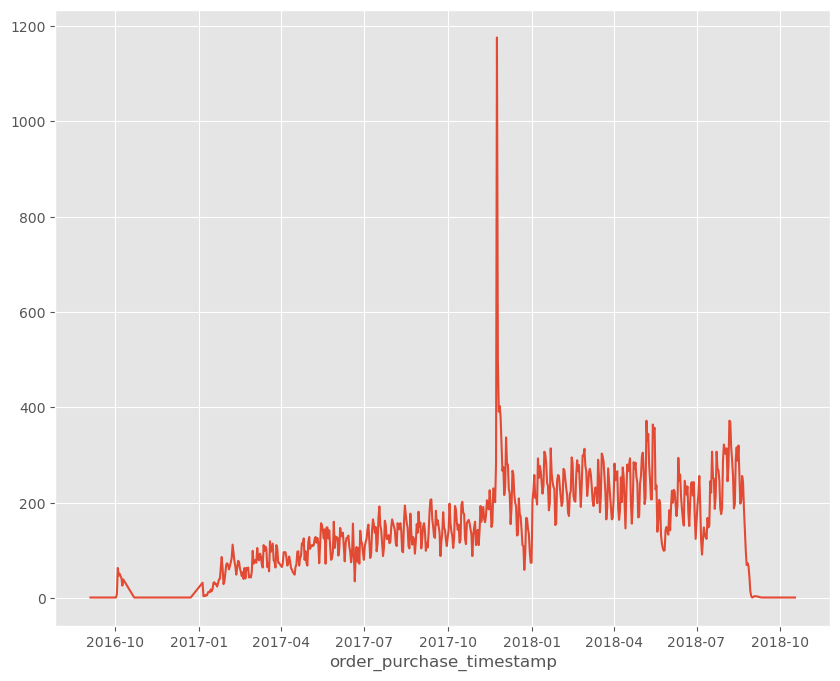

In [10]:
customers_orders.groupby(
    pd.to_datetime(customers_orders["order_purchase_timestamp"]).dt.date
).count()["order_id"].plot(figsize=(10, 8))
plt.show()

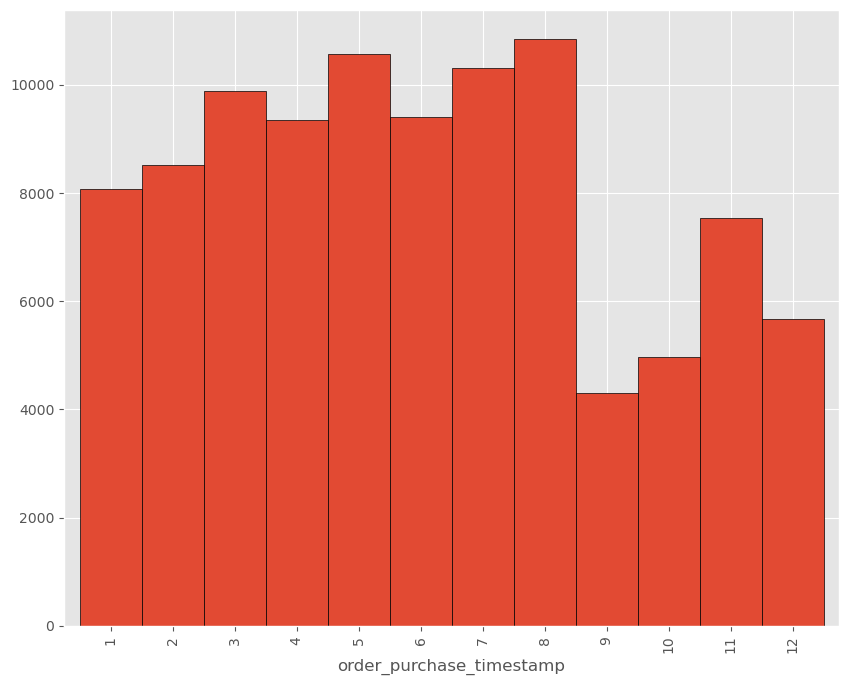

In [11]:
customers_orders.groupby(
    pd.to_datetime(customers_orders["order_purchase_timestamp"]).dt.month
).count()["order_id"].plot(kind="bar", width=1, edgecolor="black", figsize=(10, 8))
plt.show()

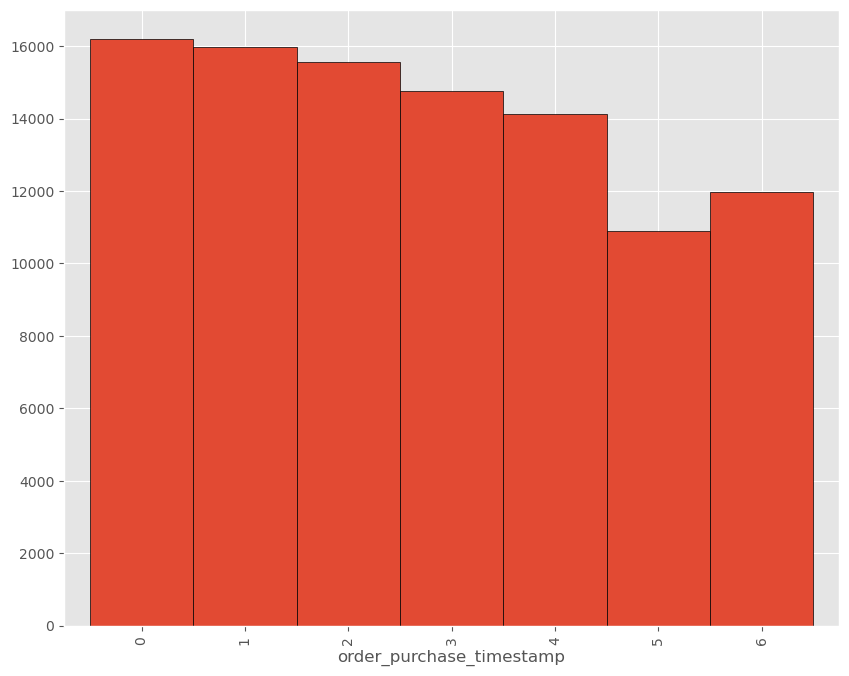

In [12]:
customers_orders.groupby(
    pd.to_datetime(customers_orders["order_purchase_timestamp"]).dt.dayofweek
).count()["order_id"].plot(kind="bar", width=1, edgecolor="black", figsize=(10, 8))
plt.show()

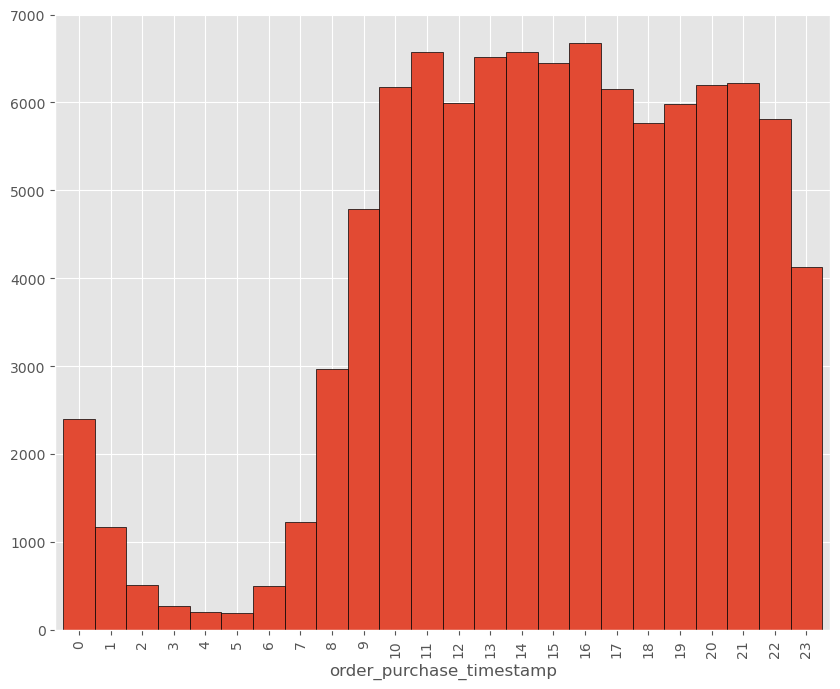

In [13]:
customers_orders.groupby(
    pd.to_datetime(customers_orders["order_purchase_timestamp"]).dt.hour
).count()["order_id"].plot(kind="bar", width=1, edgecolor="black", figsize=(10, 8))
plt.show()

## order_reviews :

In [14]:
dfs["olist_order_reviews"]

review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 4                  NaN   
1                 5                  NaN   
2                 5                  NaN   
3                 5                  NaN   
4                 5                  NaN   
...             ...                  ...   
99219             5                  NaN   
99220             5                  NaN   
99221             5                  NaN   
99222             4                  NaN   
99223             1                  NaN   

                                  review_comment_message review_creation_date  \
0                                                    NaN  2018-01-18 00:00:00   
1                                                    NaN  2018-03-10 00:00:00   
2                                                    NaN  2018-02-17 00:00:00   
3                  Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4      Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
...                                                  ...                  ...   
99219                                                NaN  2018-07-07 00:00:00   
99220                                                NaN  2017-12-09 00:00:00   
99221  Excelente mochila, entrega super rápida. Super...  2018-03-22 00:00:00   
99222                                                NaN  2018-07-01 00:00:00   
99223  meu produto chegou e ja tenho que devolver, po...  2017-07-03 00:00:00   

      review_answer_timestamp  
0         2018-01-18 21:46:59  
1         2018-03-11 03:05:13  
2         2018-02-18 14:36:24  
3         2017-04-21 22:02:06  
4         2018-03-02 10:26:53  
...                       ...  
99219     2018-07-14 17:18:30  
99220     2017-12-11 20:06:42  
99221     2018-03-23 09:10:43  
99222     2018-07-02 12:59:13  
99223     2017-07-03 21:01:49  

[99224 rows x 7 columns]

In [15]:
dfs["olist_orders"]["order_id"].nunique()

99441

In [16]:
dfs["olist_order_reviews"]["order_id"].nunique()

98673

768 commandes sans review

In [17]:
dfs["olist_order_reviews"]["order_id"].duplicated().sum()

551

In [18]:
dfs["olist_order_reviews"][
    dfs["olist_order_reviews"]["order_id"].duplicated(keep=False)
].sort_values("order_id")

review_id                          order_id  \
25612  89a02c45c340aeeb1354a24e7d4b2c1e  0035246a40f520710769010f752e7507   
22423  2a74b0559eb58fc1ff842ecc999594cb  0035246a40f520710769010f752e7507   
22779  ab30810c29da5da8045216f0f62652a2  013056cfe49763c6f66bda03396c5ee3   
68633  73413b847f63e02bc752b364f6d05ee9  013056cfe49763c6f66bda03396c5ee3   
854    830636803620cdf8b6ffaf1b2f6e92b2  0176a6846bcb3b0d3aa3116a9a768597   
...                                 ...                               ...   
27465  5e78482ee783451be6026e5cf0c72de1  ff763b73e473d03c321bcd5a053316e8   
41355  39de8ad3a1a494fc68cc2d5382f052f4  ff850ba359507b996e8b2fbb26df8d03   
18783  80f25f32c00540d49d57796fb6658535  ff850ba359507b996e8b2fbb26df8d03   
92230  870d856a4873d3a67252b0c51d79b950  ffaabba06c9d293a3c614e0515ddbabc   
53962  5476dd0eaee7c4e2725cafb011aa758c  ffaabba06c9d293a3c614e0515ddbabc   

       review_score review_comment_title  \
25612             5                  NaN   
22423             5                  NaN   
22779             5                  NaN   
68633             4                  NaN   
854               5                  NaN   
...             ...                  ...   
27465             3                  NaN   
41355             5                  NaN   
18783             5                  NaN   
92230             3                  NaN   
53962             3                  NaN   

                                  review_comment_message review_creation_date  \
25612                                                NaN  2017-08-29 00:00:00   
22423  Estou acostumada a comprar produtos pelo barat...  2017-08-25 00:00:00   
22779                                                NaN  2018-02-22 00:00:00   
68633                                                NaN  2018-03-04 00:00:00   
854                                                  NaN  2017-12-30 00:00:00   
...                                                  ...                  ...   
27465  Não sei que haverá acontecido os demais chegaram   2017-11-18 00:00:00   
41355                       Envio rapido... Produto 100%  2017-08-16 00:00:00   
18783  Envio rapido, produto conforme descrito no anu...  2017-08-22 00:00:00   
92230                                                NaN  2017-12-20 00:00:00   
53962                                                NaN  2017-12-20 00:00:00   

      review_answer_timestamp  
25612     2017-08-30 01:59:12  
22423     2017-08-29 21:45:57  
22779     2018-02-23 12:12:30  
68633     2018-03-05 17:02:00  
854       2018-01-02 10:54:06  
...                       ...  
27465     2017-11-18 09:02:48  
41355     2017-08-17 11:56:55  
18783     2017-08-25 11:40:22  
92230     2017-12-20 18:50:16  
53962     2017-12-21 13:24:55  

[1098 rows x 7 columns]

551 orders with multiple reviews

In [19]:
dfs["olist_order_reviews"].drop_duplicates("order_id")

review_id                          order_id  \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0                 4                  NaN   
1                 5                  NaN   
2                 5                  NaN   
3                 5                  NaN   
4                 5                  NaN   
...             ...                  ...   
99219             5                  NaN   
99220             5                  NaN   
99221             5                  NaN   
99222             4                  NaN   
99223             1                  NaN   

                                  review_comment_message review_creation_date  \
0                                                    NaN  2018-01-18 00:00:00   
1                                                    NaN  2018-03-10 00:00:00   
2                                                    NaN  2018-02-17 00:00:00   
3                  Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4      Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   
...                                                  ...                  ...   
99219                                                NaN  2018-07-07 00:00:00   
99220                                                NaN  2017-12-09 00:00:00   
99221  Excelente mochila, entrega super rápida. Super...  2018-03-22 00:00:00   
99222                                                NaN  2018-07-01 00:00:00   
99223  meu produto chegou e ja tenho que devolver, po...  2017-07-03 00:00:00   

      review_answer_timestamp  
0         2018-01-18 21:46:59  
1         2018-03-11 03:05:13  
2         2018-02-18 14:36:24  
3         2017-04-21 22:02:06  
4         2018-03-02 10:26:53  
...                       ...  
99219     2018-07-14 17:18:30  
99220     2017-12-11 20:06:42  
99221     2018-03-23 09:10:43  
99222     2018-07-02 12:59:13  
99223     2017-07-03 21:01:49  

[98673 rows x 7 columns]

In [21]:
customers_orders_reviews = customers_orders.merge(
    dfs["olist_order_reviews"].drop_duplicates("order_id"),
    on="order_id",
    how="outer",
    validate="1:1",
)

customers_orders_reviews.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   

     order_approved_at order_delivered_carrier_date  \
0  2017-05-16 15:22:12          2017-05-23 10:47:57   
1  2018-01-12 20:58:32          2018-01-15 17:14:59   
2  2018-05-20 16:19:10          2018-06-11 14:31:00   
3  2018-03-13 17:29:19          2018-03-27 23:22:42   
4  2018-07-29 10:10:09          2018-07-30 15:16:00   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2017-05-25 10:35:35           2017-06-05 00:00:00   
1           2018-01-29 12:41:19           2018-02-06 00:00:00   
2           2018-06-14 17:58:51           2018-06-13 00:00:00   
3           2018-03-28 16:04:25           2018-04-10 00:00:00   
4           2018-08-09 20:55:48           2018-08-15 00:00:00   

                          review_id  review_score review_comment_title  \
0  88b8b52d46df026a9d1ad2136a59b30b           4.0                  NaN   
1  02fc48a9efa3e3d0f1a8ea26507eeec3           5.0                  NaN   
2  5ad6695d76ee186dc473c42706984d87           5.0                  NaN   
3  059a801bb31f6aab2266e672cab87bc5           5.0                  NaN   
4  8490879d58d6c5d7773f2739a03f089a           5.0        a melhor nota   

                          review_comment_message review_creation_date  \
0                                            NaN  2017-05-26 00:00:00   
1                                            NaN  2018-01-30 00:00:00   
2                                            NaN  2018-06-15 00:00:00   
3                                            NaN  2018-03-29 00:00:00   
4  O baratheon è esxelente Amo adoro o baratheon  2018-08-10 00:00:00   

  review_answer_timestamp  
0     2017-05-30 22:34:40  
1     2018-02-10 22:43:29  
2     2018-06-15 12:10:59  
3     2018-04-02 18:36:47  
4     2018-08-17 01:59:52

## order_items :

In [22]:
dfs["olist_order_items"]

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date   price  freight_value  
0       2017-09-19 09:45:35   58.90          13.29  
1       2017-05-03 11:05:13  239.90          19.93  
2       2018-01-18 14:48:30  199.00          17.87  
3       2018-08-15 10:10:18   12.99          12.79  
4       2017-02-13 13:57:51  199.90          18.14  
...                     ...     ...            ...  
112645  2018-05-02 04:11:01  299.99          43.41  
112646  2018-07-20 04:31:48  350.00          36.53  
112647  2017-10-30 17:14:25   99.90          16.95  
112648  2017-08-21 00:04:32   55.99           8.72  
112649  2018-06-12 17:10:13   43.00          12.79  

[112650 rows x 7 columns]

In [23]:
dfs["olist_order_items"]["order_id"].nunique()

98666

Mois de commandes que dans *"olist_orders"*

In [24]:
dfs["olist_order_items"]["order_id"].isna().sum()

0

In [25]:
dfs["olist_order_items"]["order_id"].duplicated().sum()

13984

In [26]:
dfs["olist_order_items"]

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date   price  freight_value  
0       2017-09-19 09:45:35   58.90          13.29  
1       2017-05-03 11:05:13  239.90          19.93  
2       2018-01-18 14:48:30  199.00          17.87  
3       2018-08-15 10:10:18   12.99          12.79  
4       2017-02-13 13:57:51  199.90          18.14  
...                     ...     ...            ...  
112645  2018-05-02 04:11:01  299.99          43.41  
112646  2018-07-20 04:31:48  350.00          36.53  
112647  2017-10-30 17:14:25   99.90          16.95  
112648  2017-08-21 00:04:32   55.99           8.72  
112649  2018-06-12 17:10:13   43.00          12.79  

[112650 rows x 7 columns]

Ajout de la catégorie des produits :

In [27]:
dfs["olist_products"]["product_id"].nunique()

32951

In [28]:
dfs["olist_order_items"]["product_id"].nunique()

32951

In [29]:
order_items_product_category = dfs["olist_order_items"].merge(
    dfs["olist_products"][["product_id", "product_category_name"]],
    on="product_id",
    validate="m:1",
)
order_items_product_category.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  130898c0987d1801452a8ed92a670612              1   
2  532ed5e14e24ae1f0d735b91524b98b9              1   
3  6f8c31653edb8c83e1a739408b5ff750              1   
4  7d19f4ef4d04461989632411b7e588b9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
2  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
3  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
4  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   

   shipping_limit_date  price  freight_value product_category_name  
0  2017-09-19 09:45:35   58.9          13.29            cool_stuff  
1  2017-07-05 02:44:11   55.9          17.96            cool_stuff  
2  2018-05-23 10:56:25   64.9          18.33            cool_stuff  
3  2017-08-07 18:55:08   58.9          16.17            cool_stuff  
4  2017-08-16 22:05:11   58.9          13.29            cool_stuff

Category name translation :

In [30]:
category_translation = pd.Series(
    dfs["product_category_name_translation"]["product_category_name_english"].values,
    index=dfs["product_category_name_translation"].product_category_name,
).to_dict()

In [31]:
order_items_product_category["product_category_name"] = order_items_product_category[
    "product_category_name"
].map(category_translation)

In [32]:
order_items_product_category["product_category_name"].value_counts().sort_values()

security_and_services            2
fashion_childrens_clothes        8
cds_dvds_musicals               14
la_cuisine                      14
arts_and_craftmanship           24
                             ...  
computers_accessories         7827
furniture_decor               8334
sports_leisure                8641
health_beauty                 9670
bed_bath_table               11115
Name: product_category_name, Length: 71, dtype: int64

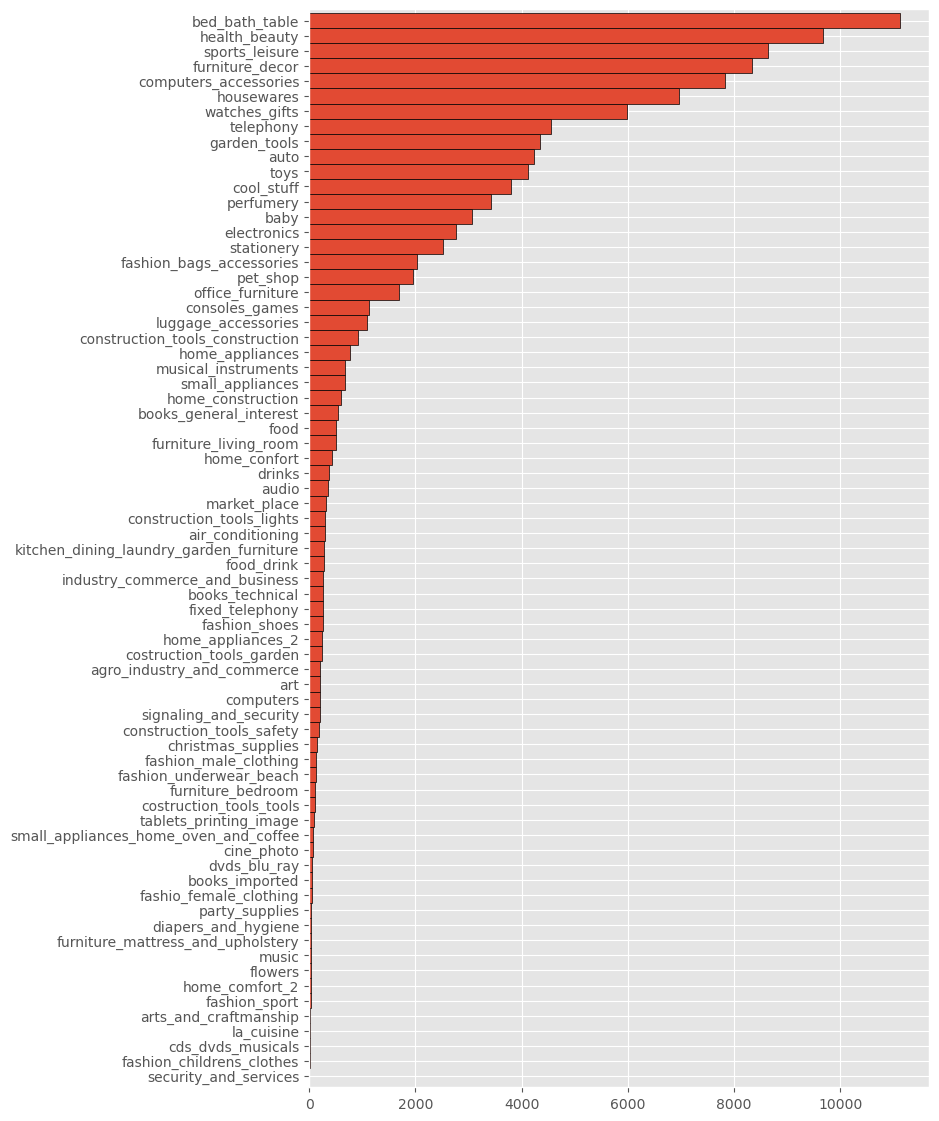

In [33]:
order_items_product_category["product_category_name"].value_counts().sort_values().plot(
    kind="barh", width=1, edgecolor="black", figsize=(8, 14)
)
plt.show()

In [35]:
order_items_product_category_grouped = order_items_product_category.groupby(
    "order_id", as_index=False
)[["price", "freight_value", "product_category_name", "shipping_limit_date"]].agg(
    {
        "price": "sum",
        "freight_value": "sum",
        "product_category_name": "unique",
        "shipping_limit_date": "max",
    }
)
order_items_product_category_grouped.head()

order_id   price  freight_value  \
0  00010242fe8c5a6d1ba2dd792cb16214   58.90          13.29   
1  00018f77f2f0320c557190d7a144bdd3  239.90          19.93   
2  000229ec398224ef6ca0657da4fc703e  199.00          17.87   
3  00024acbcdf0a6daa1e931b038114c75   12.99          12.79   
4  00042b26cf59d7ce69dfabb4e55b4fd9  199.90          18.14   

  product_category_name  shipping_limit_date  
0          [cool_stuff]  2017-09-19 09:45:35  
1            [pet_shop]  2017-05-03 11:05:13  
2     [furniture_decor]  2018-01-18 14:48:30  
3           [perfumery]  2018-08-15 10:10:18  
4        [garden_tools]  2017-02-13 13:57:51

In [36]:
order_items_product_category_grouped["nb_of_product"] = (
    order_items_product_category.groupby("order_id")["product_id"].count().values
)

In [37]:
dfs["olist_orders"][
    ~dfs["olist_orders"]["order_id"].isin(
        list(order_items_product_category_grouped["order_id"])
    )
]

order_id                       customer_id  \
266    8e24261a7e58791d10cb1bf9da94df5c  64a254d30eed42cd0e6c36dddb88adf0   
586    c272bcd21c287498b4883c7512019702  9582c5bbecc65eb568e2c1d839b5cba1   
687    37553832a3a89c9b2db59701c357ca67  7607cd563696c27ede287e515812d528   
737    d57e15fb07fd180f06ab3926b39edcd2  470b93b3f1cde85550fc74cd3a476c78   
1130   00b1cb0320190ca0daa2c88b35206009  3532ba38a3fd242259a514ac2b6ae6b6   
...                                 ...                               ...   
99252  aaab15da689073f8f9aa978a390a69d1  df20748206e4b865b2f14a5eabbfcf34   
99283  3a3cddda5a7c27851bd96c3313412840  0b0d6095c5555fe083844281f6b093bb   
99347  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   
99348  a69ba794cc7deb415c3e15a0a3877e69  726f0894b5becdf952ea537d5266e543   
99415  5fabc81b6322c8443648e1b21a6fef21  32c9df889d41b0ee8309a5efb6855dcb   

      order_status order_purchase_timestamp    order_approved_at  \
266    unavailable      2017-11-16 15:09:28  2017-11-16 15:26:57   
586    unavailable      2018-01-31 11:31:37  2018-01-31 14:23:50   
687    unavailable      2017-08-14 17:38:02  2017-08-17 00:15:18   
737    unavailable      2018-01-08 19:39:03  2018-01-09 07:26:08   
1130      canceled      2018-08-28 15:26:39                  NaN   
...            ...                      ...                  ...   
99252  unavailable      2018-01-16 14:27:59  2018-01-17 03:37:34   
99283     canceled      2018-08-31 16:13:44                  NaN   
99347     canceled      2018-09-06 18:45:47                  NaN   
99348  unavailable      2017-08-23 16:28:04  2017-08-28 15:44:47   
99415  unavailable      2017-10-10 10:50:03  2017-10-14 18:35:57   

      order_delivered_carrier_date order_delivered_customer_date  \
266                            NaN                           NaN   
586                            NaN                           NaN   
687                            NaN                           NaN   
737                            NaN                           NaN   
1130                           NaN                           NaN   
...                            ...                           ...   
99252                          NaN                           NaN   
99283                          NaN                           NaN   
99347                          NaN                           NaN   
99348                          NaN                           NaN   
99415                          NaN                           NaN   

      order_estimated_delivery_date  
266             2017-12-05 00:00:00  
586             2018-02-16 00:00:00  
687             2017-09-05 00:00:00  
737             2018-02-06 00:00:00  
1130            2018-09-12 00:00:00  
...                             ...  
99252           2018-02-06 00:00:00  
99283           2018-10-01 00:00:00  
99347           2018-09-27 00:00:00  
99348           2017-09-15 00:00:00  
99415           2017-10-23 00:00:00  

[775 rows x 8 columns]

In [38]:
dfs["olist_orders"][
    ~dfs["olist_orders"]["order_id"].isin(
        list(order_items_product_category_grouped["order_id"])
    )
]["order_status"].value_counts()

unavailable    603
canceled       164
created          5
invoiced         2
shipped          1
Name: order_status, dtype: int64

Les commandes non-présentes dans *olist_order_items* sont celles qui n'ont pas été livrées

In [39]:
customers_orders_reviews_items = customers_orders_reviews.merge(
    order_items_product_category_grouped, on="order_id", validate="1:1"
)

## order_payment :

In [40]:
dfs["olist_order_payments"]

order_id  payment_sequential payment_type  \
0       b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1       a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2       25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3       ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4       42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
...                                  ...                 ...          ...   
103881  0406037ad97740d563a178ecc7a2075c                   1       boleto   
103882  7b905861d7c825891d6347454ea7863f                   1  credit_card   
103883  32609bbb3dd69b3c066a6860554a77bf                   1  credit_card   
103884  b8b61059626efa996a60be9bb9320e10                   1  credit_card   
103885  28bbae6599b09d39ca406b747b6632b1                   1       boleto   

        payment_installments  payment_value  
0                          8          99.33  
1                          1          24.39  
2                          1          65.71  
3                          8         107.78  
4                          2         128.45  
...                      ...            ...  
103881                     1         363.31  
103882                     2          96.80  
103883                     1          47.77  
103884                     5         369.54  
103885                     1         191.58  

[103886 rows x 5 columns]

In [41]:
dfs["olist_order_payments"]["order_id"].nunique()

99440

In [42]:
dfs["olist_orders"]["order_id"].nunique()

99441

In [43]:
dfs["olist_order_payments"].duplicated().sum()

0

In [44]:
dfs["olist_order_payments"][
    dfs["olist_order_payments"]["order_id"].duplicated(keep=False)
].sort_values("order_id")

order_id  payment_sequential payment_type  \
80856  0016dfedd97fc2950e388d2971d718c7                   2      voucher   
89575  0016dfedd97fc2950e388d2971d718c7                   1  credit_card   
20036  002f19a65a2ddd70a090297872e6d64e                   1      voucher   
98894  002f19a65a2ddd70a090297872e6d64e                   2      voucher   
30155  0071ee2429bc1efdc43aa3e073a5290e                   2      voucher   
...                                 ...                 ...          ...   
21648  ffa1dd97810de91a03abd7bd76d2fed1                   2      voucher   
32912  ffa39020fe7c8a3e907320e1bec4b985                   1  credit_card   
3009   ffa39020fe7c8a3e907320e1bec4b985                   2      voucher   
75188  ffc730a0615d28ec19f9cad02cb41442                   1  credit_card   
28537  ffc730a0615d28ec19f9cad02cb41442                   2  credit_card   

       payment_installments  payment_value  
80856                     1          17.92  
89575                     5          52.63  
20036                     1          44.11  
98894                     1          33.18  
30155                     1          92.44  
...                     ...            ...  
21648                     1         418.73  
32912                     1           7.13  
3009                      1          64.01  
75188                     1          14.76  
28537                     1          12.63  

[7407 rows x 5 columns]

In [45]:
customers_orders_reviews_items.query('order_id == "0016dfedd97fc2950e388d2971d718c7"')

customer_id                customer_unique_id  \
72232  2c8b917c5d7dd720ebe36a5ed3b501ec  33febb33a42a35f5826a22584b127f9d   

       customer_zip_code_prefix customer_city customer_state  \
72232                     45860   canavieiras             BA   

                               order_id order_status order_purchase_timestamp  \
72232  0016dfedd97fc2950e388d2971d718c7    delivered      2017-04-28 19:54:40   

         order_approved_at order_delivered_carrier_date  \
72232  2017-04-29 10:05:12          2017-05-16 08:40:49   

      order_delivered_customer_date order_estimated_delivery_date  \
72232           2017-05-22 18:32:21           2017-06-01 00:00:00   

                              review_id  review_score review_comment_title  \
72232  f11d548dc1a7c713bff0b6d2ef0dff7c           5.0                  NaN   

      review_comment_message review_creation_date review_answer_timestamp  \
72232                    NaN  2017-05-23 00:00:00     2017-05-24 20:08:51   

       price  freight_value product_category_name  shipping_limit_date  \
72232  49.75           20.8        [garden_tools]  2017-05-05 10:05:12   

       nb_of_product  
72232              1

*payment_value* = *price* + *freight_value*

In [46]:
order_payments_grouped = (
    dfs["olist_order_payments"]
    .groupby("order_id", as_index=False)[
        ["payment_type", "payment_installments", "payment_value"]
    ]
    .agg(
        {
            "payment_value": "sum",
            "payment_installments": "sum",
            "payment_type": "unique",
        }
    )
)

In [47]:
order_payments_grouped["order_id"].nunique()

99440

In [48]:
customers_orders_reviews_items_payments = customers_orders_reviews_items.merge(
    order_payments_grouped, on="order_id", validate="1:1"
)

customers_orders_reviews_items_payments.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   

     order_approved_at order_delivered_carrier_date  \
0  2017-05-16 15:22:12          2017-05-23 10:47:57   
1  2018-01-12 20:58:32          2018-01-15 17:14:59   
2  2018-05-20 16:19:10          2018-06-11 14:31:00   
3  2018-03-13 17:29:19          2018-03-27 23:22:42   
4  2018-07-29 10:10:09          2018-07-30 15:16:00   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2017-05-25 10:35:35           2017-06-05 00:00:00   
1           2018-01-29 12:41:19           2018-02-06 00:00:00   
2           2018-06-14 17:58:51           2018-06-13 00:00:00   
3           2018-03-28 16:04:25           2018-04-10 00:00:00   
4           2018-08-09 20:55:48           2018-08-15 00:00:00   

                          review_id  review_score review_comment_title  \
0  88b8b52d46df026a9d1ad2136a59b30b           4.0                  NaN   
1  02fc48a9efa3e3d0f1a8ea26507eeec3           5.0                  NaN   
2  5ad6695d76ee186dc473c42706984d87           5.0                  NaN   
3  059a801bb31f6aab2266e672cab87bc5           5.0                  NaN   
4  8490879d58d6c5d7773f2739a03f089a           5.0        a melhor nota   

                          review_comment_message review_creation_date  \
0                                            NaN  2017-05-26 00:00:00   
1                                            NaN  2018-01-30 00:00:00   
2                                            NaN  2018-06-15 00:00:00   
3                                            NaN  2018-03-29 00:00:00   
4  O baratheon è esxelente Amo adoro o baratheon  2018-08-10 00:00:00   

  review_answer_timestamp   price  freight_value product_category_name  \
0     2017-05-30 22:34:40  124.99          21.88    [office_furniture]   
1     2018-02-10 22:43:29  289.00          46.48          [housewares]   
2     2018-06-15 12:10:59  139.94          17.79    [office_furniture]   
3     2018-04-02 18:36:47  149.94          23.36    [office_furniture]   
4     2018-08-17 01:59:52  230.00          22.25        [home_confort]   

   shipping_limit_date  nb_of_product  payment_value  payment_installments  \
0  2017-05-22 15:22:12              1         146.87                     2   
1  2018-01-18 20:58:32              1         335.48                     8   
2  2018-06-05 16:19:10              1         157.73                     7   
3  2018-03-27 16:31:16              1         173.30                     1   
4  2018-07-31 10:10:09              1         252.25                     8   

    payment_type  
0  [credit_card]  
1  [credit_card]  
2  [credit_card]  
3  [credit_card]  
4  [credit_card]

## geolocation :

In [49]:
dfs["olist_geolocation"]

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                               1037       -23.545621       -46.639292   
1                               1046       -23.546081       -46.644820   
2                               1046       -23.546129       -46.642951   
3                               1041       -23.544392       -46.639499   
4                               1035       -23.541578       -46.641607   
...                              ...              ...              ...   
1000158                        99950       -28.068639       -52.010705   
1000159                        99900       -27.877125       -52.224882   
1000160                        99950       -28.071855       -52.014716   
1000161                        99980       -28.388932       -51.846871   
1000162                        99950       -28.070104       -52.018658   

        geolocation_city geolocation_state  
0              sao paulo                SP  
1              sao paulo                SP  
2              sao paulo                SP  
3              sao paulo                SP  
4              sao paulo                SP  
...                  ...               ...  
1000158         tapejara                RS  
1000159   getulio vargas                RS  
1000160         tapejara                RS  
1000161  david canabarro                RS  
1000162         tapejara                RS  

[1000163 rows x 5 columns]

In [50]:
dfs["olist_geolocation"]["geolocation_zip_code_prefix"].nunique()

19015

In [51]:
customers_orders_reviews_items_payments["customer_zip_code_prefix"].nunique()

14976

In [52]:
dfs["olist_geolocation"][
    dfs["olist_geolocation"].duplicated(
        subset="geolocation_zip_code_prefix", keep=False
    )
]

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                               1037       -23.545621       -46.639292   
1                               1046       -23.546081       -46.644820   
2                               1046       -23.546129       -46.642951   
3                               1041       -23.544392       -46.639499   
4                               1035       -23.541578       -46.641607   
...                              ...              ...              ...   
1000158                        99950       -28.068639       -52.010705   
1000159                        99900       -27.877125       -52.224882   
1000160                        99950       -28.071855       -52.014716   
1000161                        99980       -28.388932       -51.846871   
1000162                        99950       -28.070104       -52.018658   

        geolocation_city geolocation_state  
0              sao paulo                SP  
1              sao paulo                SP  
2              sao paulo                SP  
3              sao paulo                SP  
4              sao paulo                SP  
...                  ...               ...  
1000158         tapejara                RS  
1000159   getulio vargas                RS  
1000160         tapejara                RS  
1000161  david canabarro                RS  
1000162         tapejara                RS  

[999120 rows x 5 columns]

Même zip_code mais différentes coordonnées

In [53]:
customers_orders_reviews_items_payments["customer_zip_code_prefix"].nunique()

14976

In [54]:
customers_orders_reviews_items_payments_geo = (
    customers_orders_reviews_items_payments.merge(
        dfs["olist_geolocation"].drop_duplicates(subset="geolocation_zip_code_prefix"),
        left_on="customer_zip_code_prefix",
        right_on="geolocation_zip_code_prefix",
        how="left",
        validate="m:1",
    )
)

In [55]:
customers_orders_reviews_items_payments_geo.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  \
0                     14409                 franca             SP   
1                      9790  sao bernardo do campo             SP   
2                      1151              sao paulo             SP   
3                      8775        mogi das cruzes             SP   
4                     13056               campinas             SP   

                           order_id order_status order_purchase_timestamp  \
0  00e7ee1b050b8499577073aeb2a297a1    delivered      2017-05-16 15:05:35   
1  29150127e6685892b6eab3eec79f59c7    delivered      2018-01-12 20:48:24   
2  b2059ed67ce144a36e2aa97d2c9e9ad2    delivered      2018-05-19 16:07:45   
3  951670f92359f4fe4a63112aa7306eba    delivered      2018-03-13 16:06:38   
4  6b7d50bd145f6fc7f33cebabd7e49d0f    delivered      2018-07-29 09:51:30   

     order_approved_at order_delivered_carrier_date  \
0  2017-05-16 15:22:12          2017-05-23 10:47:57   
1  2018-01-12 20:58:32          2018-01-15 17:14:59   
2  2018-05-20 16:19:10          2018-06-11 14:31:00   
3  2018-03-13 17:29:19          2018-03-27 23:22:42   
4  2018-07-29 10:10:09          2018-07-30 15:16:00   

  order_delivered_customer_date order_estimated_delivery_date  \
0           2017-05-25 10:35:35           2017-06-05 00:00:00   
1           2018-01-29 12:41:19           2018-02-06 00:00:00   
2           2018-06-14 17:58:51           2018-06-13 00:00:00   
3           2018-03-28 16:04:25           2018-04-10 00:00:00   
4           2018-08-09 20:55:48           2018-08-15 00:00:00   

                          review_id  review_score review_comment_title  \
0  88b8b52d46df026a9d1ad2136a59b30b           4.0                  NaN   
1  02fc48a9efa3e3d0f1a8ea26507eeec3           5.0                  NaN   
2  5ad6695d76ee186dc473c42706984d87           5.0                  NaN   
3  059a801bb31f6aab2266e672cab87bc5           5.0                  NaN   
4  8490879d58d6c5d7773f2739a03f089a           5.0        a melhor nota   

                          review_comment_message review_creation_date  \
0                                            NaN  2017-05-26 00:00:00   
1                                            NaN  2018-01-30 00:00:00   
2                                            NaN  2018-06-15 00:00:00   
3                                            NaN  2018-03-29 00:00:00   
4  O baratheon è esxelente Amo adoro o baratheon  2018-08-10 00:00:00   

  review_answer_timestamp   price  freight_value product_category_name  \
0     2017-05-30 22:34:40  124.99          21.88    [office_furniture]   
1     2018-02-10 22:43:29  289.00          46.48          [housewares]   
2     2018-06-15 12:10:59  139.94          17.79    [office_furniture]   
3     2018-04-02 18:36:47  149.94          23.36    [office_furniture]   
4     2018-08-17 01:59:52  230.00          22.25        [home_confort]   

   shipping_limit_date  nb_of_product  payment_value  payment_installments  \
0  2017-05-22 15:22:12              1         146.87                     2   
1  2018-01-18 20:58:32              1         335.48                     8   
2  2018-06-05 16:19:10              1         157.73                     7   
3  2018-03-27 16:31:16              1         173.30                     1   
4  2018-07-31 10:10:09              1         252.25                     8   

    payment_type  geolocation_zip_code_prefix  geolocation_lat  \
0  [credit_card]                      14409.0       -20.509897   
1  [credit_card]                       9790.0       -23

## df :

In [56]:
df = customers_orders_reviews_items_payments_geo.copy()

In [57]:
df = df.drop(
    ["geolocation_city", "geolocation_state", "geolocation_zip_code_prefix"], axis=1
)

In [58]:
df["customer_unique_id"].nunique()

95419

In [59]:
df["customer_id"].nunique()

98665

In [60]:
df.isna().sum().sort_values(ascending=False)

review_comment_title             87203
review_comment_message           58404
order_delivered_customer_date     2190
order_delivered_carrier_date      1009
review_answer_timestamp            749
review_creation_date               749
review_score                       749
review_id                          749
geolocation_lat                    274
geolocation_lng                    274
order_approved_at                   14
order_estimated_delivery_date        0
customer_zip_code_prefix             0
payment_type                         0
payment_installments                 0
payment_value                        0
nb_of_product                        0
shipping_limit_date                  0
product_category_name                0
freight_value                        0
price                                0
customer_city                        0
customer_state                       0
order_id                             0
customer_unique_id                   0
order_status             

In [61]:
df[df["order_delivered_customer_date"].isna()]  # commandes pas encore livrées 

customer_id                customer_unique_id  \
46     c132855c926907970dcf6f2bf0b33a24  a8ae36a2bb6c2bbc3b5d62ede131c9ef   
69     4c7241af24b5344cb01fe687643de4fe  b157c176c3fe04914fde33f2dc8b878a   
78     f6529ffebe6b3440d45d89604a4239ac  e5dbefdfdf3eff75c8e6cd655f128279   
99     ae76a4650235ab18764708174f1da31e  2b6082a140c439e2df870c85b0aa5e88   
112    8891eb5ca0e28df961b2b5b8f3c0eb23  13ac6da47fef1b17b16f511e03b57918   
...                                 ...                               ...   
98472  6a65b5d6d4f4c9dfda93798cf014ee47  5b66137675c164a7df3b639bf1e86134   
98504  9ce70b8dafe76524f3d5e5e68cbf29f5  6edd9e4a22b7ab02db2a87f13bfd2d2a   
98512  2a6fc1968c4a29c9c258bb1994afbc7f  205a1c797b2c6e626d560900a3ebde6b   
98575  f83083fcbc51d12f8279b5713c2d4b4d  0465f164e35aba70f70e911b252513a9   
98634  35de8ab44ecc9a65225a5ef51294d204  3011394a1b8d1b04e425dd5dc77cbaaf   

       customer_zip_code_prefix          customer_city customer_state  \
46                        18740            taquarituba             SP   
69                        60336              fortaleza             CE   
78                        26272            nova iguacu             RJ   
99                         2983              sao paulo             SP   
112                        2632              sao paulo             SP   
...                         ...                    ...            ...   
98472                      3959              sao paulo             SP   
98504                     14093         ribeirao preto             SP   
98512                     27210          volta redonda             RJ   
98575                     77807              araguaina             TO   
98634                      9616  sao bernardo do campo             SP   

                               order_id order_status order_purchase_timestamp  \
46     b5172d4a722c0ebb34c29bbbb7a3cb42     invoiced      2018-04-17 13:14:13   
69     ad380680e87dea0f2abf5cd5bace626c      shipped      2018-01-21 15:54:02   
78     cc07a8fdd3a8e94d683c8142a117dbc1      shipped      2018-01-11 17:11:11   
99     4c33ec562d9dc5655e160913aa86eb53      shipped      2017-08-11 23:47:48   
112    ff536d93ae4214b4d51c2894ccfc569f      shipped      2017-12-21 09:01:00   
...                                 ...          ...                      ...   
98472  8c0dd54ff6a273a02de12494c6bf299f      shipped      2018-07-17 22:35:46   
98504  e5e59fe47003046e2ed48ebb641564b2      shipped      2018-04-27 13:52:12   
98512  12d9fe1a3efa51a7fae337cba819adc1      shipped      2017-02-08 13:07:19   
98575  67384817c871ae183b24f9a0a6eb9bbc      shipped      2018-01-25 12:12:37   
98634  27613f16c823ee73e2da1a6116467293   processing      2018-01-04 20:10:42   

         order_approved_at order_delivered_carrier_date  \
46     2018-04-18 05:31:51                          NaN   
69     2018-01-22 13:52:41          2018-01-24 18:26:40   
78     2018-01-12 17:49:45          2018-01-17 16:56:32   
99     2017-08-12 00:03:51          2017-08-14 13:24:58   
112    2017-12-22 12:33:26          2018-01-03 18:22:09   
...                    ...                          ...   
98472  2018-07-18 21:22:25          2018-07-30 09:00:00   
98504  2018-04-27 14:09:00          2018-05-02 14:39:00   
98512  2017-02-09 02:50:42          2017-02-09 10:56:46   
98575  2018-01-25 12:31:27          2018-01-26 17:49:00   
98634  2018-01-04 20:31:53                          NaN   

      order_delivered_customer_date order_estimated_delivery_date  \
46                              NaN           2018-05-24 00:00:00   
69                              NaN           2018-02-20 00:00:00   
78                              NaN           2018-02-09 00:00:00   
99                              NaN           2017-09-11 00:00:00   
112                             NaN           2018-01-10 00:00:00   
...                             ...                           ...   
98472                           NaN           2018-08-02 00:0

In [62]:
df[df["order_delivered_customer_date"].isna()]["review_score"].value_counts(
    normalize=True
)

1.0    0.702923
5.0    0.091519
3.0    0.077623
2.0    0.070915
4.0    0.057020
Name: review_score, dtype: float64

In [63]:
df["nb_orders"] = df["customer_unique_id"].map(
    dict(df.groupby("customer_unique_id")["customer_id"].count())
)

In [64]:
df.query("nb_orders > 1")  # uniquement les clients ayant effectué plusieurs commandes

customer_id                customer_unique_id  \
5      879864dab9bc3047522c92c82e1212b8  4c93744516667ad3b8f1fb645a3116a4   
8      5adf08e34b2e993982a47070956c5c65  1175e95fb47ddff9de6b2b06188f7e0d   
13     eabebad39a88bb6f5b52376faec28612  295c05e81917928d76245e842748184d   
32     2d5831cb2dff7cdefba62e950ae3dc7b  e9dd12dca17352644a959d9dea133935   
33     b2bed119388167a954382cca36c4777f  e079b18794454de9d2be5c12b4392294   
...                                 ...                               ...   
98548  5b46a0d983eec8c97363bea78d4a69dd  8bab3162259edfaadd1ea2e1fe7f58dc   
98551  c1affa46f9f3b514555259049a0307b9  12ab9334b1240d6d037f2b0102a49571   
98560  ebf46ff530343a129926adc1f831dea4  0ee57f62666561b72f2ceacad0230cbf   
98577  282fbce48e4d2077aad602dd125c9225  0ceb502fc33a2ad327b08288c5310e2e   
98630  d9110683c7a282144e9fc97660026a28  5cbfdb85ec130898108b32c50d619c39   

       customer_zip_code_prefix         customer_city customer_state  \
5                         89254        jaragua do sul             SC   
8                         81560              curitiba             PR   
13                         5704             sao paulo             SP   
32                        42800              camacari             BA   
33                        27525               resende             RJ   
...                         ...                   ...            ...   
98548                     31565        belo horizonte             MG   
98551                     38050               uberaba             MG   
98560                      9530    sao caetano do sul             SP   
98577                     29134                 viana             ES   
98630                     74980  aparecida de goiania             GO   

                               order_id order_status order_purchase_timestamp  \
5      5741ea1f91b5fbab2bd2dc653a5b5099    delivered      2017-09-14 18:14:31   
8      1ebeea841c590e86a14a0d7a48e7d062    delivered      2018-01-18 12:35:44   
13     852d2f4d37773bcbc21c8e09a05a4ea5    delivered      2018-03-07 15:57:14   
32     19c0c76962278b152cc44fc63ffd5e48    delivered      2018-04-18 09:42:53   
33     77b062be7c5bd21712905feb8e1cfeed    delivered      2017-06-14 18:31:54   
...                                 ...          ...                      ...   
98548  3aefaf9d41208dba8b2c336def99b00f    delivered      2017-10-29 11:59:50   
98551  46984ee8227e1926e055327b55ad576c    delivered      2017-12-13 17:35:26   
98560  181ff95f97fee531c4afa9e882186f18    delivered      2018-06-20 14:16:20   
98577  0e48ca107de4291a6f7536b4f5cf512e    delivered      2018-05-15 10:39:41   
98630  e65fa5f31ce4436d38bcf5e109fd43e4    delivered      2018-01-24 17:53:44   

         order_approved_at order_delivered_carrier_date  \
5      2017-09-14 18:25:11          2017-09-18 21:27:40   
8      2018-01-18 12:56:32          2018-01-18 23:25:35   
13     2018-03-07 16:15:30          2018-03-12 23:02:49   
32     2018-04-18 09:55:17          2018-04-20 18:52:39   
33     2017-06-15 18:43:04          2017-06-22 08:11:38   
...                    ...                          ...   
98548  2017-10-30 10:12:39          2017-10-31 18:42:00   
98551  2017-12-15 02:17:39          2017-12-19 20:33:02   
98560  2018-06-20 14:38:41          2018-06-20 15:02:00   
98577  2018-05-15 14:30:29          2018-05-15 15:55:00   
98630  2018-01-24 18:12:41          2018-01-30 15:13:39   

      order_delivered_customer_date order_estimated_delivery_date  \
5               2017-09-28 17:32:43           2017-10-04 00:00:00   
8               2018-01-26 15:17:57           2018-02-20 00:00:00   
13              2018-03-15 00:46:30           2018-03-19 00:00:00   
32              2018-05-17 20:19:49           2018-05-18 00:00:00   
33              2017-07-07 20:32:47           2017-07-07 00:00:00   
...                             ...                           ...   
98548           2017-11-06 21:18:53           2017-11-24 00:00:00   
9855

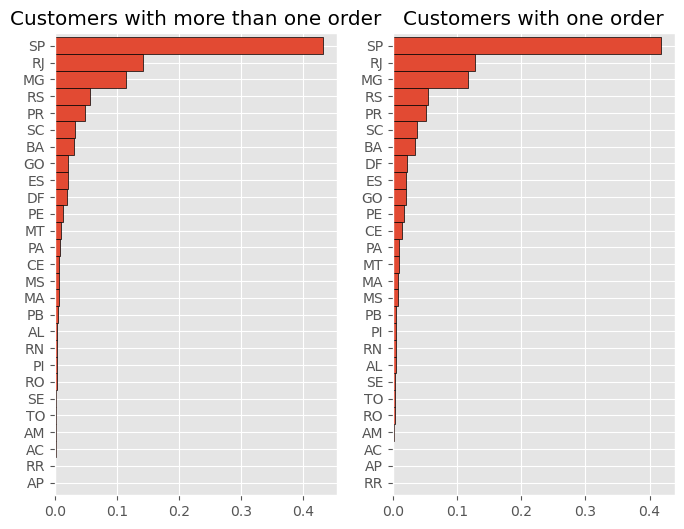

In [65]:
fig, axs = plt.subplots(1, 2)
df.query("nb_orders > 1")["customer_state"].value_counts(
    normalize=True
).sort_values().plot(
    kind="barh",
    width=1,
    edgecolor="black",
    figsize=(8, 6),
    ax=axs[0],
    title="Customers with more than one order",
)
df.query("nb_orders == 1")["customer_state"].value_counts(
    normalize=True
).sort_values().plot(
    kind="barh",
    width=1,
    edgecolor="black",
    figsize=(8, 6),
    ax=axs[1],
    title="Customers with one order",
)
plt.show()

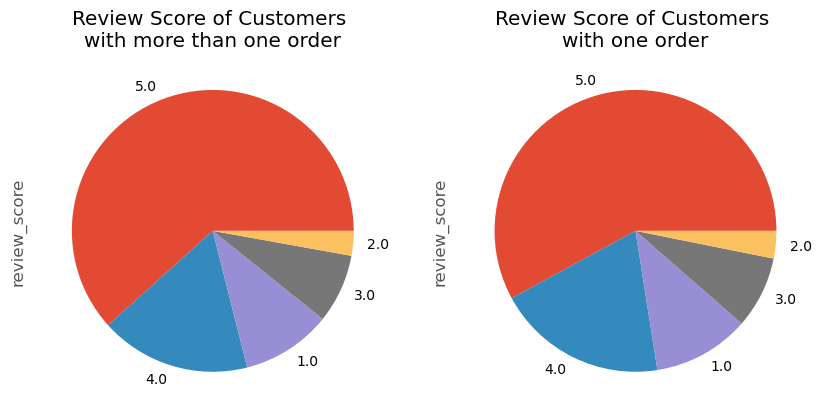

In [66]:
fig, axs = plt.subplots(1, 2)

df.query("nb_orders > 1")["review_score"].value_counts(normalize=True).plot(
    kind="pie",
    ax=axs[0],
    title="Review Score of Customers \nwith more than one order",
    figsize=(10, 5),
)
df.query("nb_orders == 1")["review_score"].value_counts(normalize=True).plot(
    kind="pie",
    ax=axs[1],
    title="Review Score of Customers \nwith one order",
    figsize=(10, 5),
)

plt.show()

In [67]:
df.query("nb_orders > 1")["review_score"].value_counts(normalize=True)

5.0    0.616721
4.0    0.172623
1.0    0.103115
3.0    0.079180
2.0    0.028361
Name: review_score, dtype: float64

In [68]:
df.query("nb_orders == 1")["review_score"].value_counts(normalize=True)

5.0    0.579278
4.0    0.195598
1.0    0.110917
3.0    0.082644
2.0    0.031563
Name: review_score, dtype: float64

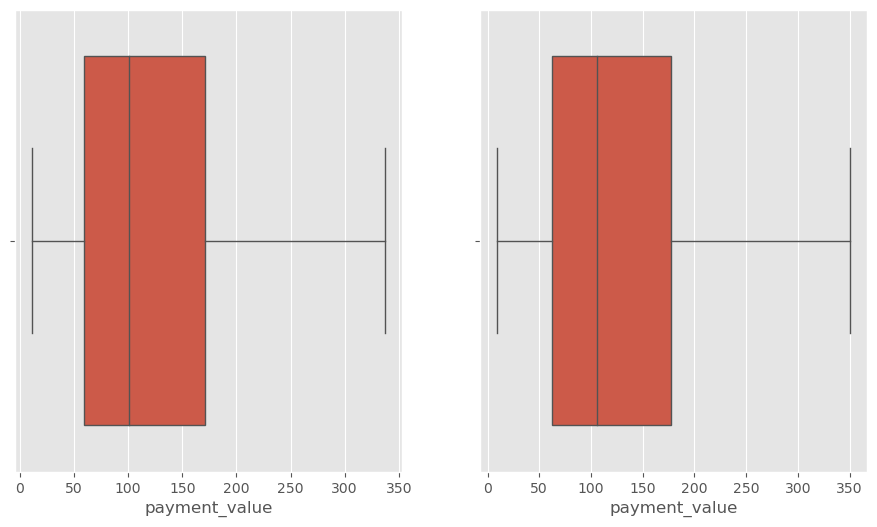

In [69]:
fig, axs = plt.subplots(1, 2, figsize=(11, 6))
sns.boxplot(
    data=df.query("nb_orders > 1"),
    x="payment_value",
    ax=axs[0],
    showfliers=False,
    linewidth=1,
)
sns.boxplot(
    data=df.query("nb_orders == 1"),
    x="payment_value",
    ax=axs[1],
    showfliers=False,
    linewidth=1,
)
plt.show()

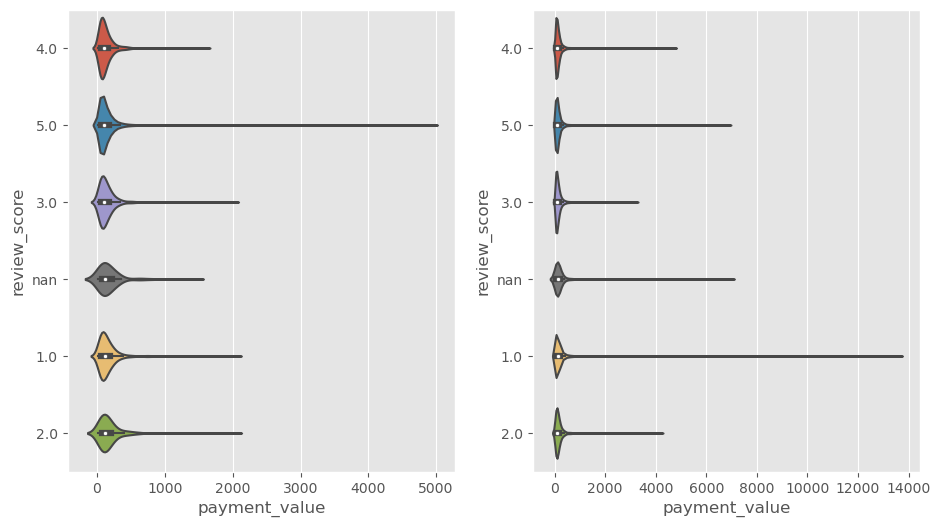

In [77]:
fig, axs = plt.subplots(1, 2, figsize=(11, 6))

sns.violinplot(
    data=df.query("nb_orders > 1").sort_values("review_score"),
    y=df["review_score"].astype("str"),
    x="payment_value",
    ax=axs[0],
)
sns.violinplot(
    data=df.query("nb_orders == 1").sort_values("review_score"),
    y=df["review_score"].astype("str"),
    x="payment_value",
    ax=axs[1],
)

plt.show()

In [79]:
df.query("nb_orders == 1").query("payment_value > 10_000")

customer_id                customer_unique_id  \
6154  1617b1357756262bfa56ab541c47bc16  0a0a92112bd4c708ca5fde585afaa872   

      customer_zip_code_prefix   customer_city customer_state  \
6154                     20080  rio de janeiro             RJ   

                              order_id order_status order_purchase_timestamp  \
6154  03caa2c082116e1d31e67e9ae3700499    delivered      2017-09-29 15:24:52   

        order_approved_at order_delivered_carrier_date  \
6154  2017-10-02 15:28:20          2017-10-10 15:43:17   

     order_delivered_customer_date order_estimated_delivery_date  \
6154           2017-10-17 18:22:29           2017-10-23 00:00:00   

                             review_id  review_score review_comment_title  \
6154  211fa81a22870cc634265ea85b751e40           1.0                  NaN   

                                 review_comment_message review_creation_date  \
6154  Peço por favor verificar a entrega do pedido, ...  2017-10-18 00:00:00   

     review_answer_timestamp    price  freight_value product_category_name  \
6154     2017-10-19 13:10:39  13440.0         224.08     [fixed_telephony]   

      shipping_limit_date  nb_of_product  payment_value  payment_installments  \
6154  2017-10-06 15:28:20              8       13664.08                     1   

       payment_type  geolocation_lat  geolocation_lng  nb_orders  
6154  [credit_card]       -22.901095       -43.182559          1

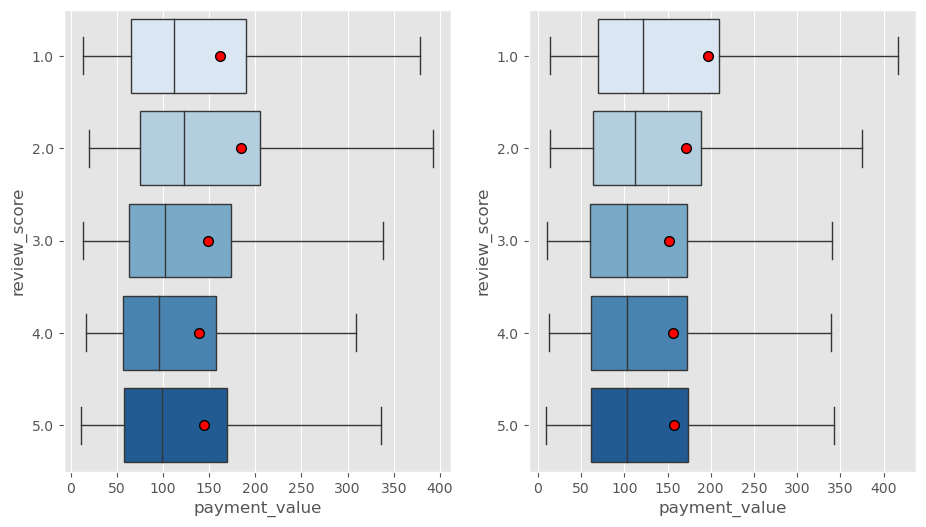

In [81]:
df["review_score"] = df["review_score"].astype("string")

fig, axs = plt.subplots(1, 2, figsize=(11, 6))

sns.boxplot(
    data=df.query("nb_orders > 1").sort_values("review_score"),
    x="payment_value",
    y="review_score",
    showfliers=False,
    palette="Blues",
    linewidth=1,
    showmeans=True,
    meanprops={
        "marker": "o",
        "markerfacecolor": "red",
        "markeredgecolor": "black",
        "markersize": "7",
    },
    ax=axs[0],
)

sns.boxplot(
    data=df.query("nb_orders == 1").sort_values("review_score"),
    x="payment_value",
    y="review_score",
    showfliers=False,
    palette="Blues",
    linewidth=1,
    showmeans=True,
    meanprops={
        "marker": "o",
        "markerfacecolor": "red",
        "markeredgecolor": "black",
        "markersize": "7",
    },
    ax=axs[1],
)

plt.show()

In [82]:
import folium
from folium.plugins import HeatMap

In [106]:
df["customer_unique_id"].nunique()

95419

In [107]:
m = folium.Map(location=[-20.509897, -47.397866], zoom_start=4)

HeatMap(
    data=df.drop_duplicates("customer_unique_id")[
        ["geolocation_lat", "geolocation_lng"]
    ].dropna(),
    radius=10,
).add_to(m)

m

Carte des clients ayant effectué plusieurs commandes :

In [109]:
m = folium.Map(location=[-20.509897, -47.397866], zoom_start=4)

HeatMap(
    data=df.query("nb_orders > 1")
    .drop_duplicates("customer_unique_id")[["geolocation_lat", "geolocation_lng"]]
    .dropna(),
    radius=10,
).add_to(m)

m

Carte des clients ayant effectué une seule commande :

In [111]:
m = folium.Map(location=[-20.509897, -47.397866], zoom_start=4)

HeatMap(
    data=df.query("nb_orders == 1")
    .drop_duplicates("customer_unique_id")[["geolocation_lat", "geolocation_lng"]]
    .dropna(),
    radius=10,
).add_to(m)

m

In [88]:
df["order_delivered_customer_date"] = pd.to_datetime(
    df["order_delivered_customer_date"]
)
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])

df["delivery_time"] = (
    df["order_delivered_customer_date"] - df["order_purchase_timestamp"]
)

In [94]:
df.query("nb_orders == 1")["order_status"].value_counts(normalize=True)

delivered      0.977785
shipped        0.011167
canceled       0.004659
invoiced       0.003200
processing     0.003103
unavailable    0.000065
approved       0.000022
Name: order_status, dtype: float64

In [95]:
df.query("nb_orders > 1")["order_status"].value_counts(normalize=True)

delivered     0.978406
shipped       0.011853
canceled      0.004871
invoiced      0.002598
processing    0.002273
Name: order_status, dtype: float64

In [96]:
df["freight_ratio"] = (df["freight_value"] / df["price"]).replace(np.inf, 0)

In [93]:
df["freight_ratio"].describe()

count    98665.000000
mean         0.308391
std          0.314763
min          0.000000
25%          0.131864
50%          0.224374
75%          0.380196
max         21.447059
Name: freight_ratio, dtype: float64

In [97]:
df.query("freight_value > price")

customer_id                customer_unique_id  \
17     c5c61596a3b6bd0cee5766992c48a9a1  b6e99561fe6f34a55b0b7da92f8ed775   
45     19cecb194f54e614b70d971306a9931b  d251c190ca75786e9ab937982d60d1d4   
57     230c0d740401730c7197d16376893525  a302a693d5722d95984e6472150b9391   
74     0aae2862f8eac77f10a34f44860720ac  cd076285a12f40041b32f5ad8c98699f   
101    443b534d0d27a8aa9a184d4869bcbe7a  4071d48a2d0d0bf179c06fc42b962e1f   
...                                 ...                               ...   
98475  f9a232e21b669e5a1063711f040cd360  5565d43d43220145dcdcde6cef348434   
98500  96c128001eb80c129f9356e856f17446  698ded466b27adf5e02289db9fb07765   
98576  d3a6b2cfce40a4817ca0224808197e58  514f2a78d07928478ac9212b21b7acbc   
98583  800ae98df618c84cf1dae67ea96644c5  a7941a8ddbfe8fde0bd23ae272484043   
98594  e5f5462d1fc4d04da9427f0ef274ec32  640e495d067507f00505a6faf48e527f   

       customer_zip_code_prefix        customer_city customer_state  \
17                         7124            guarulhos             SP   
45                        30320       belo horizonte             MG   
57                        85808             cascavel             PR   
74                         5890            sao paulo             SP   
101                       89260       jaragua do sul             SC   
...                         ...                  ...            ...   
98475                     59518           sao rafael             RN   
98500                     35490  entre rios de minas             MG   
98576                     11671        caraguatatuba             SP   
98583                     26381            queimados             RJ   
98594                      8490            sao paulo             SP   

                               order_id order_status order_purchase_timestamp  \
17     ec28553b12bef4b538e5d7454464a1c6    delivered      2018-06-18 13:34:21   
45     14282bc70be9bdda515182fb1ce62af4    delivered      2018-04-18 14:18:09   
57     f481e2c2c039ab1665d048d7e2cf5e00    delivered      2018-06-06 16:53:30   
74     0c65b54ed2c147ffd0092eb2308ee63d    delivered      2017-03-23 11:07:12   
101    9f50c2639dfe5494951bc9d4d1a3ff87    delivered      2017-12-15 09:23:57   
...                                 ...          ...                      ...   
98475  4c95b21e5d08a34a3a48839f2d007982    delivered      2018-02-23 20:43:58   
98500  9a623ce03254eb3cf475d659d0719319    delivered      2018-03-26 21:26:46   
98576  2ca9036cf880a76f0a41894ede902e55    delivered      2017-07-12 15:40:39   
98583  4e44d7b0462e32a51de74a16eac6534e    delivered      2017-02-02 16:18:44   
98594  dbc01c2664181f1d91a6e30ec814ad57    delivered      2018-02-18 20:03:20   

         order_approved_at order_delivered_carrier_date  \
17     2018-06-18 13:55:47          2018-06-19 15:07:00   
45     2018-04-19 02:52:02          2018-04-20 00:47:44   
57     2018-06-06 17:13:05          2018-06-08 14:46:00   
74     2017-03-23 11:07:12          2017-03-24 10:36:22   
101    2017-12-15 09:34:24          2017-12-20 01:04:17   
...                    ...                          ...   
98475  2018-02-23 20:55:50          2018-02-26 19:06:43   
98500  2018-03-28 02:55:21          2018-03-28 19:05:08   
98576  2017-07-12 15:55:10          2017-07-15 14:04:36   
98583  2017-02-02 16:30:10          2017-02-03 10:15:58   
98594  2018-02-18 21:15:35          2018-02-22 19:07:20   

      order_delivered_customer_date order_estimated_delivery_date  \
17              2018-06-21 20:15:28           2018-07-03 00:00:00   
45              2018-04-26 16:26:38           2018-05-11 00:00:00   
57              2018-06-13 20:48:25           2018-07-17 00:00:00   
74              2017-04-04 14:58:07           2017-04-13 00:00:00   
101             2018-01-08 18:29:07           2018-01-17 00:00:00   
...                             ...                           ...   
98475           2018-03-17 02:12:17           2018-03-27 00:00:00   
98500           

In [98]:
df.groupby("review_score")["freight_ratio"].mean()

review_score
1.0    0.316602
2.0    0.323275
3.0    0.325372
4.0    0.313249
5.0    0.302075
Name: freight_ratio, dtype: float64

In [99]:
df.to_csv("./data/data_merged.csv", index=False)